In [3]:
# Setting up imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

sns.set(style="whitegrid")

df = pd.read_csv('/Users/harmonyedgley/Downloads/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Data Cleaning 
# 1. Check duplicates
# 2. Handle missing values 
# 3. Fix data types

# How many duplicated rows?
df.duplicated().sum()

np.int64(0)

In [6]:
 # if value > 0; removing duplicated rows

df = df.drop_duplicates()
df.shape

(8807, 12)

In [8]:
# Missing value overview
df.isna().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [9]:
# Instead of dropping 100s of rows; we will fill them with "Unknown"

cols_to_fill_unknown = ['director', 'cast', 'country']

for col in cols_to_fill_unknown:
    df[col] = df[col].fillna("Unknown")

In [10]:
df[cols_to_fill_unknown].isna().sum()

director    0
cast        0
country     0
dtype: int64

In [11]:
# Strategy for date added: Important for time-based plots
df['date_added'].isna().sum()

np.int64(10)

In [12]:
df = df.dropna(subset=['date_added'])

In [14]:
# Convert date_added to Datetime + Extract Year
# Strip whitespace and handle NaN values before conversion
df['date_added'] = df['date_added'].str.strip() if df['date_added'].dtype == 'object' else df['date_added']
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df['added_year'] = df['date_added'].dt.year

df[['date_added', 'added_year']].head()

,date_added,added_year
0,2021-09-25,2021
1,2021-09-24,2021
2,2021-09-24,2021
3,2021-09-24,2021
4,2021-09-24,2021


In [15]:
# Clean Duration
df['duration'].head(10)
df['duration'].value_counts().head(10)

duration
1 Season     1793
2 Seasons     421
3 Seasons     198
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
Name: count, dtype: int64

In [17]:
# Splitting movies vs TV shows:
movies = df[df['type'] == 'Movie'].copy()
shows = df[df['type'] == 'TV Show'].copy()

# Extract duration number for movies (in minutes)
# Using astype('float') first, then converting to int where possible with fillna
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype('float').fillna(0).astype('int')

# Extraction duration number for tv shows (in minutes)
# Using astype('float') first, then converting to int where possible with fillna
shows['seasons'] = shows['duration'].str.extract('(\d+)').astype('float').fillna(0).astype('int')

movies[['title', 'duration', 'duration_minutes']].head()
shows[['title', 'duration', 'seasons']].head()

,title,duration,seasons
1,Blood & Water,2 Seasons,2
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2
5,Midnight Mass,1 Season,1


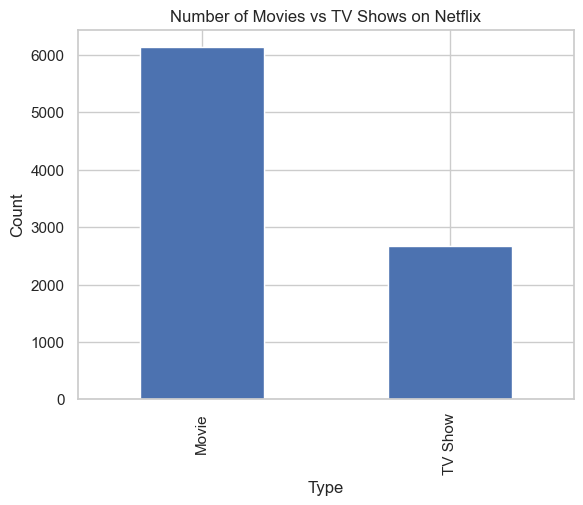

In [19]:
# Step 4: Visualization
# 4.1 - Content Type: Movies vs TV Shows

df['type'].value_counts().plot(kind='bar')
plt.title('Number of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

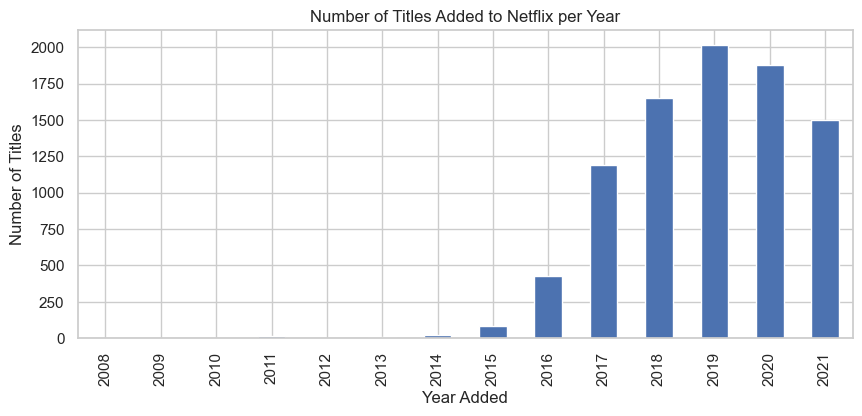

In [20]:
# 4.2 Titles Added Per Year
df['added_year'].value_counts().sort_index().plot(kind='bar', figsize=(10,4))
plt.title('Number of Titles Added to Netflix per Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()

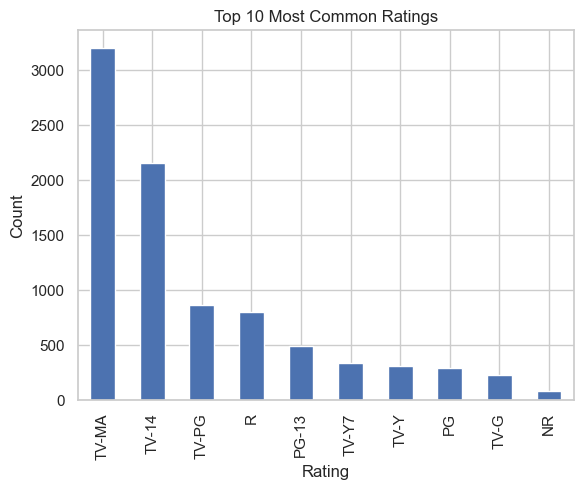

In [24]:
# 4.3 Top 10 Most Common Ratings

df['rating'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()